# K-means Clustering

In [118]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [138]:
df= pd.read_csv('out.csv')
df.head()

,sqft,bedrooms,bathrooms,Community Services,Health Services,Law & Government,Transportation,Food & Housing,Education & Employment,Assault,...,rental_type_house,rental_type_land,rental_type_loft,rental_type_suite,rental_type_townhouse,furnished_NO,furnished_NOT,furnished_YES,pet_friendly_False,pet_friendly_True
0,0.163333,0.125,0.000000,0.204082,0.402985,0.516129,0.0,0.264706,0.571429,0.58296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.142857,0.000,0.117647,0.204082,0.402985,0.516129,0.0,0.264706,0.571429,0.58296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.142857,0.000,0.117647,0.204082,0.402985,0.516129,0.0,0.264706,0.571429,0.58296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.130000,0.125,0.176471,0.204082,0.402985,0.516129,0.0,0.264706,0.571429,0.58296,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.130952,0.000,0.117647,0.204082,0.402985,0.516129,0.0,0.264706,0.571429,0.58296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [139]:
df.columns.tolist()

['sqft',
 'bedrooms',
 'bathrooms',
 'Community Services',
 'Health Services',
 'Law & Government',
 'Transportation',
 'Food & Housing',
 'Education & Employment',
 'Assault',
 'Auto Theft',
 'Break and Enter',
 'Robbery',
 'Theft Over',
 'Avg_Age',
 'avg_income',
 'price',
 'image_1',
 'fsa_M1B',
 'fsa_M1C',
 'fsa_M1E',
 'fsa_M1G',
 'fsa_M1H',
 'fsa_M1J',
 'fsa_M1K',
 'fsa_M1L',
 'fsa_M1M',
 'fsa_M1N',
 'fsa_M1P',
 'fsa_M1R',
 'fsa_M1S',
 'fsa_M1T',
 'fsa_M1V',
 'fsa_M1W',
 'fsa_M1X',
 'fsa_M2H',
 'fsa_M2J',
 'fsa_M2K',
 'fsa_M2L',
 'fsa_M2M',
 'fsa_M2N',
 'fsa_M2P',
 'fsa_M2R',
 'fsa_M3A',
 'fsa_M3B',
 'fsa_M3C',
 'fsa_M3H',
 'fsa_M3J',
 'fsa_M3K',
 'fsa_M3L',
 'fsa_M3M',
 'fsa_M3N',
 'fsa_M4A',
 'fsa_M4B',
 'fsa_M4C',
 'fsa_M4E',
 'fsa_M4G',
 'fsa_M4H',
 'fsa_M4J',
 'fsa_M4K',
 'fsa_M4L',
 'fsa_M4M',
 'fsa_M4N',
 'fsa_M4P',
 'fsa_M4R',
 'fsa_M4S',
 'fsa_M4T',
 'fsa_M4V',
 'fsa_M4W',
 'fsa_M4X',
 'fsa_M4Y',
 'fsa_M5A',
 'fsa_M5B',
 'fsa_M5C',
 'fsa_M5E',
 'fsa_M5G',
 'fsa_M5H',
 'fs

In [140]:
df.dropna(inplace=True)

In [167]:
# Use n_clusters=4 as the k value
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
# Fit the model to the data
kmeans.fit(df)

KMeans(n_clusters=3)

In [168]:
# Predict the clusters
predicted_clusters = kmeans.predict(df)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
labels

array([2, 1, 1, ..., 2, 2, 2], dtype=int32)

In [169]:
predicted_clusters

array([2, 1, 1, ..., 2, 2, 2], dtype=int32)

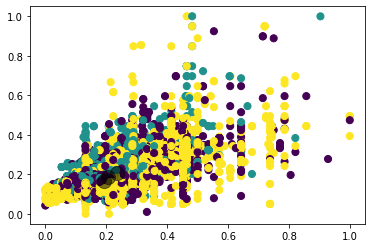

In [170]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
plt.scatter(df["sqft"], df["price"], c=predicted_clusters, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [171]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(df)
pca_2d = pca.transform(df)

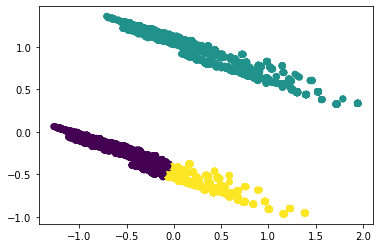

In [175]:
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
plt.show()

## Find K

In [176]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

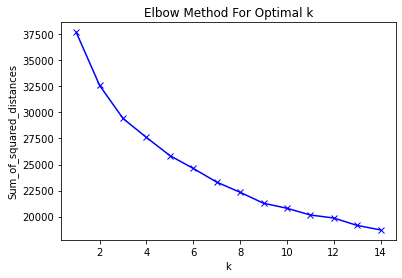

In [177]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [178]:
df_id= pd.read_csv('id.csv')
df_id.head()

,id
0,c_7195819164
1,c_7199431318
2,c_7200468956
3,c_7200513078
4,c_7200327071


In [179]:
df_id["cluster"]= predicted_clusters
df_id.head()

,id,cluster
0,c_7195819164,2
1,c_7199431318,1
2,c_7200468956,1
3,c_7200513078,0
4,c_7200327071,0


In [180]:
df_original= pd.read_csv("combined.csv")
df_original.head()

,Unnamed: 0,fsa,bathrooms,bedrooms,description,furnished,id,image,lat,long,...,Transportation,Food & Housing,Education & Employment,Avg_Age,avg_income,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
0,0,M5B,0.0,1.0,1BR / 0Ba furnished apartment/ 1br -Brand new ...,YES,c_7195819164,1,43.657200,-79.378300,...,0,9,4,36.6,46121.436,1212,96,280,246,65
1,30,M5B,1.0,0.0,0BR / 1Ba 600ft2 available oct 31 furnished co...,YES,c_7199431318,1,43.654351,-79.379160,...,0,9,4,36.6,46121.436,1212,96,280,246,65
2,66,M5B,1.0,0.0,0BR / 1Ba 600ft2 available oct 30 furnished co...,YES,c_7200468956,1,43.654382,-79.378946,...,0,9,4,36.6,46121.436,1212,96,280,246,65
3,78,M5B,1.5,1.0,1BR / 1.5Ba 564ft2 available now cats are OK -...,NOT_MENTIONED,c_7200513078,1,43.655147,-79.374925,...,0,9,4,36.6,46121.436,1212,96,280,246,65
4,142,M5B,1.0,0.0,0BR / 1Ba available now cats are OK - purrr do...,YES,c_7200327071,1,43.657200,-79.378300,...,0,9,4,36.6,46121.436,1212,96,280,246,65


In [181]:
df_final= df_original.join(df_id.set_index('id'), on='id')
df_final.head()

,Unnamed: 0,fsa,bathrooms,bedrooms,description,furnished,id,image,lat,long,...,Food & Housing,Education & Employment,Avg_Age,avg_income,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,cluster
0,0,M5B,0.0,1.0,1BR / 0Ba furnished apartment/ 1br -Brand new ...,YES,c_7195819164,1,43.657200,-79.378300,...,9,4,36.6,46121.436,1212,96,280,246,65,2.0
1,30,M5B,1.0,0.0,0BR / 1Ba 600ft2 available oct 31 furnished co...,YES,c_7199431318,1,43.654351,-79.379160,...,9,4,36.6,46121.436,1212,96,280,246,65,1.0
2,66,M5B,1.0,0.0,0BR / 1Ba 600ft2 available oct 30 furnished co...,YES,c_7200468956,1,43.654382,-79.378946,...,9,4,36.6,46121.436,1212,96,280,246,65,1.0
3,78,M5B,1.5,1.0,1BR / 1.5Ba 564ft2 available now cats are OK -...,NOT_MENTIONED,c_7200513078,1,43.655147,-79.374925,...,9,4,36.6,46121.436,1212,96,280,246,65,0.0
4,142,M5B,1.0,0.0,0BR / 1Ba available now cats are OK - purrr do...,YES,c_7200327071,1,43.657200,-79.378300,...,9,4,36.6,46121.436,1212,96,280,246,65,0.0


In [182]:
df_final['cluster'] = df_final['cluster'].replace(np.nan, 'Not Feasible to predict')

In [183]:
df_final.head()

,Unnamed: 0,fsa,bathrooms,bedrooms,description,furnished,id,image,lat,long,...,Food & Housing,Education & Employment,Avg_Age,avg_income,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,cluster
0,0,M5B,0.0,1.0,1BR / 0Ba furnished apartment/ 1br -Brand new ...,YES,c_7195819164,1,43.657200,-79.378300,...,9,4,36.6,46121.436,1212,96,280,246,65,2
1,30,M5B,1.0,0.0,0BR / 1Ba 600ft2 available oct 31 furnished co...,YES,c_7199431318,1,43.654351,-79.379160,...,9,4,36.6,46121.436,1212,96,280,246,65,1
2,66,M5B,1.0,0.0,0BR / 1Ba 600ft2 available oct 30 furnished co...,YES,c_7200468956,1,43.654382,-79.378946,...,9,4,36.6,46121.436,1212,96,280,246,65,1
3,78,M5B,1.5,1.0,1BR / 1.5Ba 564ft2 available now cats are OK -...,NOT_MENTIONED,c_7200513078,1,43.655147,-79.374925,...,9,4,36.6,46121.436,1212,96,280,246,65,0
4,142,M5B,1.0,0.0,0BR / 1Ba available now cats are OK - purrr do...,YES,c_7200327071,1,43.657200,-79.378300,...,9,4,36.6,46121.436,1212,96,280,246,65,0


In [185]:
df_final.to_csv('finalCluster.csv', index=False)